In [1]:
import numpy as np
from matplotlib import pyplot as plt

- open everything including internet and wolfram alpha.
- Just no communication
- The total score is 650. You only need to do 600 to get full score.

## Problem 1

### 1.1) (50)
Find the intersection between these two lines. Get both of them and make sure your uncertainty is less than 1e-6.

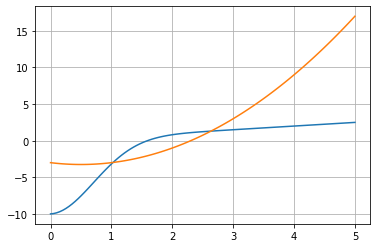

In [2]:
def f(x):
    return -10*np.exp(-x**2)+0.5*x
def g(x):
    return x**2 - x - 3
xs = np.linspace(0,5,100)
fys = f(xs)
gys = g(xs)
plt.plot(xs, fys)
plt.plot(xs, gys)
plt.grid()



### 1.2) (50)
Consider finding $\sqrt[7]{18} = x^{18}$ (the real root).

Show that we can find such number with the following formula

$$
x_{n+1} = A x_n + \frac{B}{x_n^C}
$$

Find $A, B, C$. Be careful with the sign.
    





## Problem 2 (Wolfram-alpha is your friend)

### 1)  (50)

Find taylor series for around x=0 for 4 **non-zero** term.

$f(x) = e^x \sin(x)$

and use it to find $e\times sin(1)$

### 2) (50)

Given what you did above what is your uncertainty?




## Problem 3

### 3.1 (50)
Suppose that we want to perform linear regression of data points $x^{(i)}$ and $y^{(i)}$ for $i=1\ldots n$ with the function

$$
y = A \sin(x) + B \cos(x) + C
$$

Write down the normal equation(matrix that you need to solve to get A,B,C).


### 3.2 (50)

Find Legendre Polynomial which passes through all these points

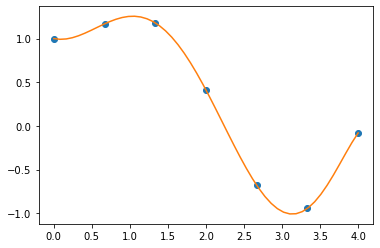

In [3]:
xs = np.linspace(0,4,7)
ys = np.sin(xs)**2 + np.cos(xs)
plt.plot(xs, ys, 'o')

def make_legendre(xs, ys):
    def legendre(x):
        summand = 0
        for ind,zz in enumerate(xs):
            xZeros = xs.copy()
            c = xZeros.pop(ind)
            num = 1
            den = 1
            for xx in xZeros:
                num *= ((x-xx)/(c-xx))
            summand += ys[ind]*num
        return summand
    return legendre

fun = make_legendre(list(xs), list(ys))
xs = np.linspace(0,4)
plt.plot(xs, fun(xs))

## Problem 4 (50)

Fit the data given in `problem4.txt` with the function of the form.
$$
    f(x) = A\exp(-(x-\mu)^2)+Bx
$$

Find $A, \mu, B$ which gives you the best fit.

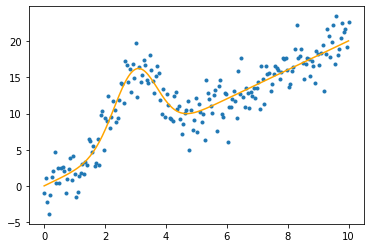

In [4]:
from scipy.optimize import minimize

xs, ys = np.loadtxt('problem4.txt')
plt.plot(xs, ys, '.')

def cost(v):
    a, u, b = v
    return sum((a*np.exp(-(xs - u)**2) + b*xs - ys)**2)

result = minimize(cost, [1,1,1])
a, u, b  = result.x

plt.plot(xs, a*np.exp(-(xs - u)**2) + b*xs, color="orange")

## Problem 5

### 5.1 (50)

Use trapezoid rule to find the following integral. Make sure the uncertainty of your answer is less than $10^{-5}$

$$
     \int_0^2 3\sin(x) \; \text{dx}
$$



### 5.2 (50)

Plot **first** and **second** derivative of $\sin(\sin(x))$ for $x=0\ldots 2\pi$. Yes there are two $\sin$s.

## Problem 6

Enough for boring basic stuff. Let's do Something Fun

### 6.1 (100)

Find the value $C$ such that the area enclosed between the two curves$f,g$ is exactly 1. Area under the blue line but above the orange line.

$$
    f(x) = -10\exp(-x^2)+0.5x\\
    g(x) = x^2 - x - C
$$






C: 2.1486854553222647
area: 0.9999814830003504


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

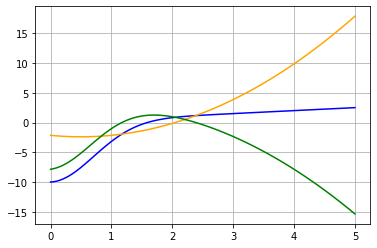

In [5]:
C = 0.9

def f(x):
    return -10*np.exp(-x**2)+0.5*x
def g(x):
    return x**2 - x - 3 # this is just an example when C = 3

def g_new(x, c):
    return x**2 - x - c



def trapezoid(f, a, b, n):
    h = abs(b-a)/n
    res = 0
    for i in range(1,n):
        res += f(a+i*h)
    return (h/2)*(f(a) + f(b) + 2*res)



def intersec_g_f(x, c):
    return f(x) - g_new(x,c)

def bisection(f, a, b, acc):
    if f(a)*f(b) > 0:
        print("No root found.")
    else:
        while (b - a)/2 > acc:
            midpoint = (a + b)/2
            if f(midpoint) == 0:
                return(midpoint) 
            elif f(a)*f(midpoint) < 0:
                b = midpoint
            else:
                a = midpoint
        return (midpoint)
    



def area(c):
    acc = 0.00001
    def intersec_g_f(x):
        return f(x) - g_new(x,c)
    
    def first_der(x):
        return (intersec_g_f(x+acc) - intersec_g_f(x-acc))/ (2*acc)

    maximum = bisection(first_der, 0.1, 4., acc)
    #print("Maximum", maximum)
    first_inter = bisection(intersec_g_f, 0.1, maximum, acc)
    #print("first inter:", first_inter)
    return trapezoid(intersec_g_f, bisection(intersec_g_f, 0.1, maximum, acc), bisection(intersec_g_f, maximum, 4., acc), 1000) - 1

c = bisection(area, 0.9, 3, 0.00001)
print("C:", c)
print("area:", area(c)+1)

xs = np.linspace(0,5,100)
fys = f(xs)
gys = g_new(xs, c)
plt.plot(xs, fys, "b")
plt.plot(xs, gys, color= "orange")
plt.grid()
plt.plot(xs, intersec_g_f(xs, c), color="green")
plt.figure


### 6.2 (100)

AJ Piti did financial calculation and found that starting a fradulent cult embezzleing money from less scientific people would make more money than being an AJ.

So, he decided to start a cult worshipping the Puyo god. To establish the cult head quarter AJ piti needs to buy **6 plots** of lands. He then tie holy threads between all 6 plots so it would looks somewhat holy. (There are $6\times5/2$ connections in total.)

However, the cost of a land plot depends on it's location(x,y). In particular the plot of land at (x,y)
$$
\text{landcost}(x,y) = 2x^2 + y^2
$$
This means that the further way the land plot is from the center the higher the cost and he needs to buy **6 plots** in total.

However, there is an advantage of buying the plot far away from each other since the longer the holy thread the more holy it looks and the more unscientific people he could lure in. In particular, the income is given buy.
$$
\text{holy thread income} = 10\times\text{total holy thread length}
$$

**Your Task:** Help AJ Piti find the **6 land plots** which would maximize the profit of his cult.

Hint: 

- `v.reshape(6,2)` would make your code a bit nicer.
- Be careful with starting point.
- You may use scipy.optimize.minimize


In [6]:
from scipy.optimize import minimize

def thread_length(a, b):
    x1, y1 = a
    x2, y2 = b
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

def landcost(x, y):
    return 2*x**2 + y**2

def thread_income(a, b):
    return 10* thread_length(a, b)

def thread_profit(a, b):
    #print(b)
    x1, y1 = a
    x2, y2 = b
    return thread_income(a, b) - landcost(x1, y1) - landcost(x2, y2)

def total_profit(plots):
    total_profit = 0
    #print(plots)
    for i in range(6):
        for l in range(i+1,6):
            total_profit += thread_profit([plots[i], plots[i+1]], [plots[l], plots[l+1]])
    return total_profit

start_plots = np.array([
    [0, 0],
    [1, 0],
    [20, 1],
    [1, -3],
    [0, 2],
    [-10, -5]
])

def profit_min(plots):
    return -1*total_profit(plots)

#print(start_plots[-1])
res = minimize(profit_min, start_plots)
plots = res.x

print(plots)
print(total_profit(plots))
      
np.array([-4.172861, 4.48998631,
                             2.33481155, 14.25183878,
                             4.17285864, -4.4899959,
                             0.58948555, -24.66488728,
                             -0.589468, 24.66488923,
                             -2.33482348, -14.25183696])

[  0.82765759  -2.63665547  -0.55428518  -1.14170707   1.92178566
   0.29780212   4.68386557  -3.           0.           2.
 -10.          -5.        ]
301.7125171921676


array([ -4.172861  ,   4.48998631,   2.33481155,  14.25183878,
         4.17285864,  -4.4899959 ,   0.58948555, -24.66488728,
        -0.589468  ,  24.66488923,  -2.33482348, -14.25183696])